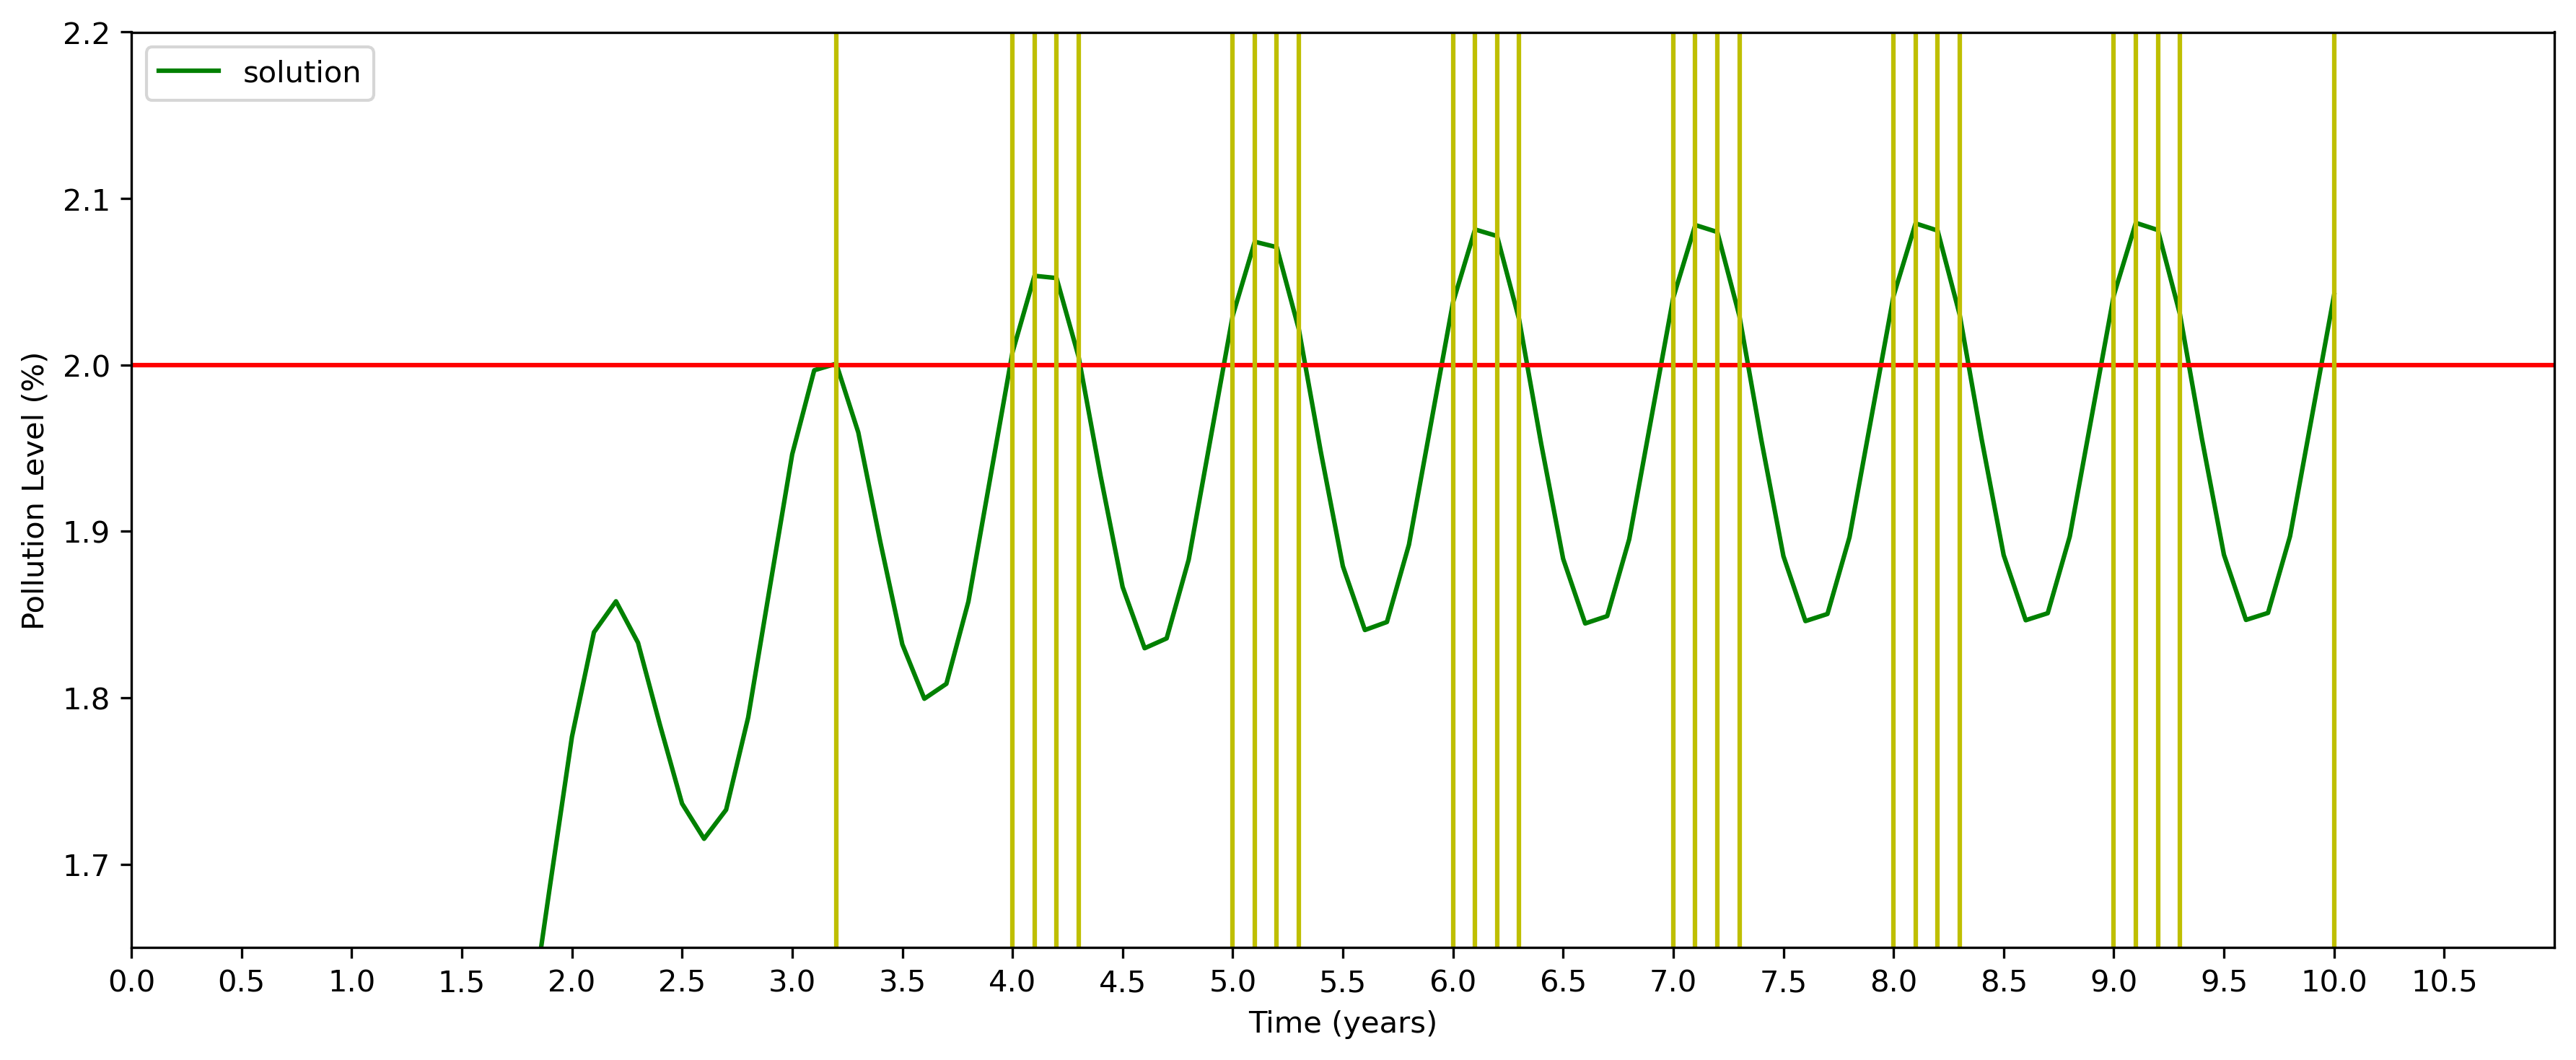

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from math import isclose

# Initialize spatial domain, partition size	
# a = 0 for t0 and b = t
a, b = 0, 10
N = 100
h = (b-a)/N
p = 2
#change this
v0 = 100

def doSimpson(a, b, n):
    h = (b-a)/n
    sum = 0
    for k in range(0,n):
        xk = a + k*h
        xkp1 = xk + h
        xkm = xk + xkp1
        sum = sum + (int_f(xk) + 4*int_f((xkm)/2) + int_f(xkp1))
    s = (h/6)*sum
    return s

def q_in(t):
	return 100 + 40*np.cos(2*np.pi*(t - 5/12))

def q_out(t):
	
	#outflow rate
	return 102.0

def int_f(t):
	return p + q_in(t) - q_out(t)

def vol(t):

	int_sol = doSimpson(a=0, b=t, n=100)

	# base strategy 1
	return v0 + 0


def dydt(t,y):
	#print(vol(t))
	return (p - (p + q_in(t))*y)/vol(t)

# Initialize independent, dependent variables
t = np.zeros(N+1)
t[0] = 0

w = np.zeros(N+1)
w[0] = 0

# Initialize exact solution
#xe = np.zeros(N+1)
#xe[0] = 1

# Do some print formatting
#print('-------------')
#print('Classical RK4')
#print('-------------')
#print('Time    Approximate  Exact       Absolute Error')
#print('-----------------------------------------------')
#print('%4.2f  %9.5f  %11.5f     %1.5e' % (t[0], w[0], xe[0], abs(xe[0] - w[0])))

# Step through time
for j in range(N):
	dt = h
	k1 = h*dydt(t[j], w[j])
	k2 = h*dydt(t[j] + h/2, w[j] + k1/2)
	k3 = h*dydt(t[j] + h/2, w[j] + k2/2)
	k4 = h*dydt(t[j] + h, w[j] + k3)
	dw = (1/6)*(k1 + 2*k2 + 2*k3 + k4)
	
	t[j+1] = t[j] + dt
	w[j+1] = w[j] + dw
	#xe[j+1] = t[j+1]*(1 + np.log(t[j+1]))
	
	#print('%4.2f  %9.5f  %11.5f     %1.5e' % (t[j+1], w[j+1], xe[j+1], abs(xe[j+1] - w[j+1])))
	
#print(w)

# graph stuff
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

#create x values
x1 = t
y1 = w*100
x = np.arange(0,11,0.5)

def is_approximately_equal(a, b, tolerance):
    return abs(a - b) <= tolerance

fig = plt.figure(facecolor=(1,1,1),figsize=(12, 5))

# plot solution
plt.plot(x1, y1, '-', color = "green",label = 'solution')
plt.legend()

plt.axhline(y = 2, color = 'r', linestyle = '-')

for i in range(len(y1)):
	if(y1[i]/100 - .02 > 0):
		plt.axvline(x = t[i], color = 'y', label = 'axvline - full height')

#for i in range(len(t)):
#	plt.axvline(x = t[i], color = 'y', label = 'axvline - full height')

#for i in range(12,31):
#	plt.axvline(x = i/3, color = 'b', label = 'axvline - full height')

#label axis
plt.xlabel("Time (years)")
plt.ylabel("Pollution Level (%)")

# constrain graph window 
plt.xlim([0, 11])
plt.ylim([1.65, 2.2])
plt.xticks(x)


#adjust image resolution
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

# display graph
plt.show()


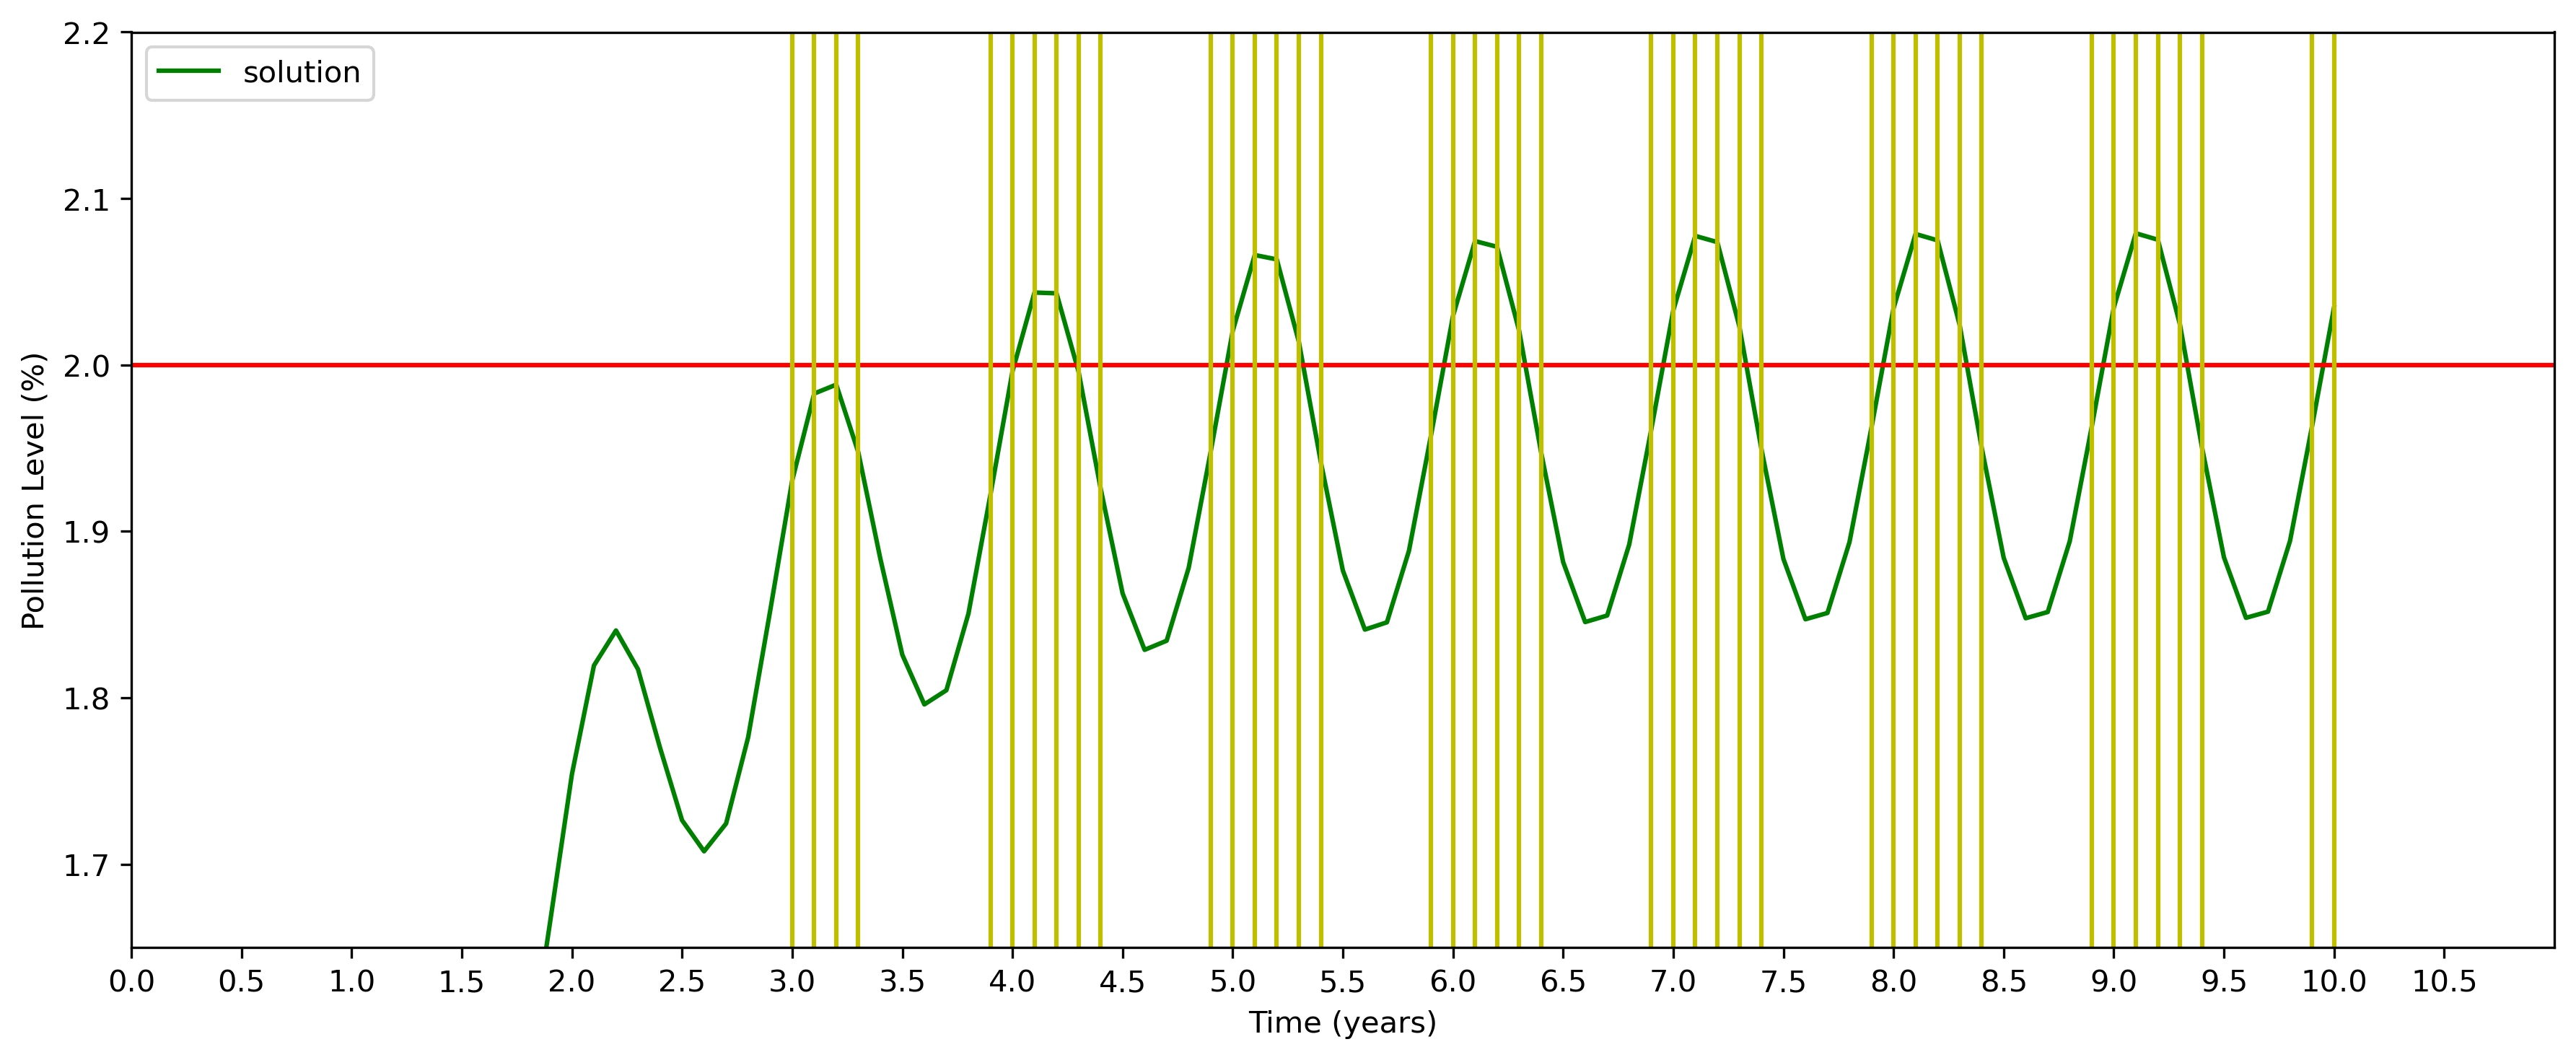

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import sys

# Initialize spatial domain, partition size	
a, b = 0, 10
N = 100
h = (b-a)/N
p = 2

#volume at t0
v0 = 100

# Initialize independent, dependent variables
t = np.zeros(N+1)
t[0] = 0

w = np.zeros(N+1)
w[0] = 0

def doSimpson(a, b, n):
    h = (b-a)/n
    sum = 0
    for k in range(0,n):
        xk = a + k*h
        xkp1 = xk + h
        xkm = xk + xkp1
        sum = sum + (int_f(xk) + 4*int_f((xkm)/2) + int_f(xkp1))
    s = (h/6)*sum
    return s

def q_in(t):
	return 100 + 40*np.cos(2*np.pi*(t - 5/12))

def q_out(t):
	
	#outflow rate
	return 102.0

def int_f(t):
	return p + q_in(t) - q_out(t)

def vol(t):

	int_sol = doSimpson(a=0, b=t, n=100)

	#print(int_sol)

	# base strategy 2
	return v0 + int_sol

def dydt(t,y):
	#print(vol(t))
	return (p - (p + q_in(t))*y)/vol(t)


# Initialize exact solution
#xe = np.zeros(N+1)
#xe[0] = 1

# Do some print formatting
#print('-------------')
#print('Classical RK4')
#print('-------------')
#print('Time    Approximate  Exact       Absolute Error')
#print('-----------------------------------------------')
#print('%4.2f  %9.5f  %11.5f     %1.5e' % (t[0], w[0], xe[0], abs(xe[0] - w[0])))

# Step through time
for j in range(N):
	dt = h
	k1 = h*dydt(t[j], w[j])
	k2 = h*dydt(t[j] + h/2, w[j] + k1/2)
	k3 = h*dydt(t[j] + h/2, w[j] + k2/2)
	k4 = h*dydt(t[j] + h, w[j] + k3)
	dw = (1/6)*(k1 + 2*k2 + 2*k3 + k4)
	
	t[j+1] = t[j] + dt
	w[j+1] = w[j] + dw
	#xe[j+1] = t[j+1]*(1 + np.log(t[j+1]))
	
	#print('%4.2f  %9.5f  %11.5f     %1.5e' % (t[j+1], w[j+1], xe[j+1], abs(xe[j+1] - w[j+1])))
	
#print(w)


# graph stuff
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

#create values
x1 = t
y1 = w*100

print()
print()
#print(y1)

def is_approximately_equal(a, b, tolerance):
    return abs(a - b) <= tolerance

fig = plt.figure(facecolor=(1,1,1),figsize=(12, 5))

#plot solution
plt.plot(x1, y1, '-', color = "green",label = 'solution')
plt.legend()

plt.axhline(y = 2, color = 'r', linestyle = '-')

for i in range(len(y1)):
	if(is_approximately_equal(y1[i]/100, 0.02, 1e-3)):
		plt.axvline(x = t[i], color = 'y', label = 'axvline - full height')

#for i in range(4,11):
#	plt.axvline(x = i, color = 'y', label = 'axvline - full height')

#label axis
plt.xlabel("Time (years)")
plt.ylabel("Pollution Level (%)")

# constrain graph window 
plt.xlim([0, 11])
plt.ylim([1.65, 2.2])
plt.xticks(x)


#adjust image resolution
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

# display graph
plt.show()


100.0
98.45209196552221
98.45209196552221
97.36728784891778
97.36728784891778
96.85177583539003
96.85177583539003
96.95601783260103
96.95601783260103
97.66980990757072
97.66980990757072
98.92328111874713
98.92328111874713
100.59373297060142
100.59373297060142
102.51764999727284
102.51764999727284
104.50670579564762
104.50670579564762
106.3661977258291
106.3661977258291
107.91410576207274
107.91410576207274
108.99890988106823
108.99890988106823
109.51442189746862
109.51442189746862
109.41017990327605
109.41017990327605
108.69638783094737
108.69638783094737
107.44291662138068
107.44291662138068
105.77246476943061
105.77246476943061
103.84854774041759
103.84854774041759
101.85949193722544
101.85949193722544
100.0
100.0
98.45209195533903
98.45209195533903
97.36728782805687
97.36728782805687
96.85177580559623
96.85177580559623
96.95601779846348
96.95601779846348
97.66980987682797
97.66980987682797
98.92328110214912
98.92328110214912
100.59373298122767
100.59373298122767
102.51765004927618
1

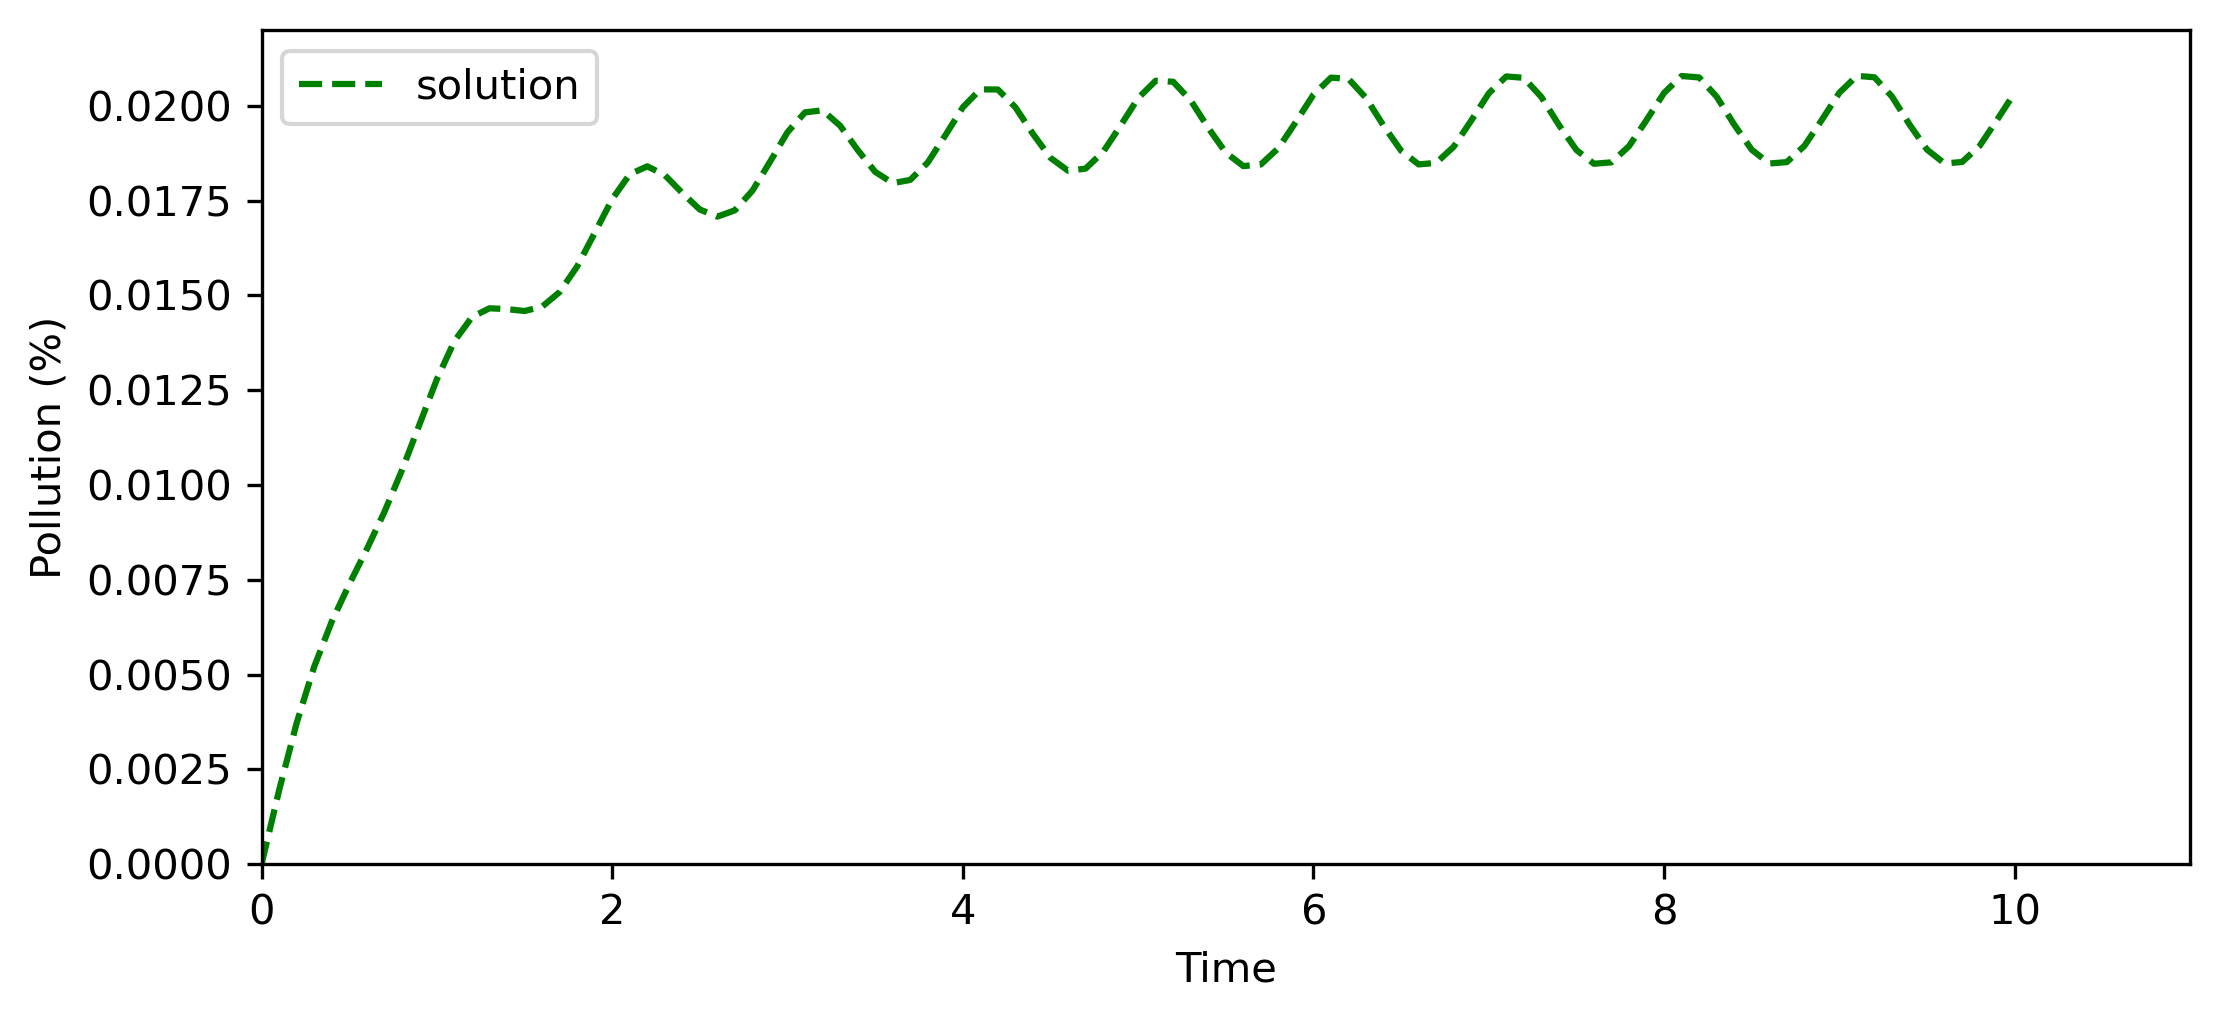

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys

# Initialize spatial domain, partition size	
# a = 0 for t0 and b = t
a, b = 0, 10
N = 100
h = (b-a)/N
p = 2
#change this
v0 = 100

def doSimpson(a, b, n):
    h = (b-a)/n
    sum = 0
    for k in range(0,n):
        xk = a + k*h
        xkp1 = xk + h
        xkm = xk + xkp1
        sum = sum + (int_f(xk) + 4*int_f((xkm)/2) + int_f(xkp1))
    s = (h/6)*sum
    return s

def q_in(t):
	return 100 + 40*np.cos(2*np.pi*(t - 5/12))

def q_out(t):
	
	#outflow rate
	return 102

def int_f(t):
	return (p + q_in(t) - q_out(t))

def vol(t):

	int_sol = doSimpson(a=0, b=t, n=100)

	# base strategy 1
	return v0 + int_sol


def dydt(t,y):
	print(vol(t))
	return (p - (p + q_in(t))*y)/vol(t)

# Initialize independent, dependent variables
t = np.zeros(N+1)
t[0] = 0

w = np.zeros(N+1)
w[0] = 0

# Initialize exact solution
#xe = np.zeros(N+1)
#xe[0] = 1

# Do some print formatting
#print('-------------')
#print('Classical RK4')
#print('-------------')
#print('Time    Approximate  Exact       Absolute Error')
#print('-----------------------------------------------')
#print('%4.2f  %9.5f  %11.5f     %1.5e' % (t[0], w[0], xe[0], abs(xe[0] - w[0])))

# Step through time
for j in range(N):
	dt = h
	k1 = h*dydt(t[j], w[j])
	k2 = h*dydt(t[j] + h/2, w[j] + k1/2)
	k3 = h*dydt(t[j] + h/2, w[j] + k2/2)
	k4 = h*dydt(t[j] + h, w[j] + k3)
	dw = (1/6)*(k1 + 2*k2 + 2*k3 + k4)
	
	t[j+1] = t[j] + dt
	w[j+1] = w[j] + dw
	#xe[j+1] = t[j+1]*(1 + np.log(t[j+1]))
	
	#print('%4.2f  %9.5f  %11.5f     %1.5e' % (t[j+1], w[j+1], xe[j+1], abs(xe[j+1] - w[j+1])))
	
#print(w)

# graph stuff
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

#create x values
x1 = t
y1 = w

print()
print()
print(y1)

#print(y1)
#print()
#print(y3)

plt.figure(facecolor=(1,1,1))

# plot solution
#plt.plot(x3, y3, '--', color = "purple", label = 'sor')
plt.plot(x1, y1, '--', color = "green",label = 'solution')
#plt.plot(x2, y2, '--',  color = "blue",label = 'gauss-seidel')
plt.legend()

#label axis
plt.xlabel("Time")
plt.ylabel("Pollution (%)")

# constrain graph window 
plt.xlim([0, 11])
plt.ylim([0, 0.022])


# display graph
plt.show()
